c:\Users\Saicharan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index (DB Index): 1.0320936207404827
Silhouette Score: 0.375242544396809


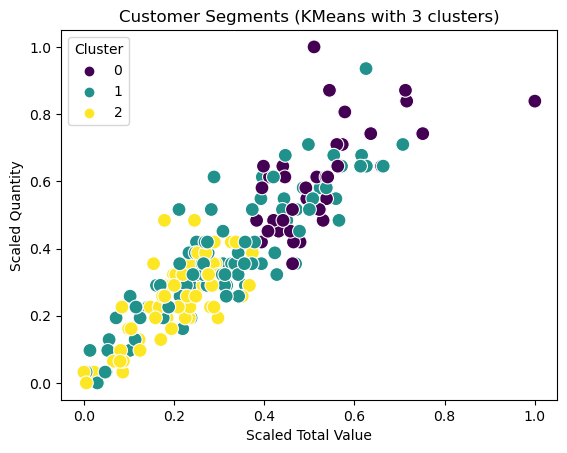

Cluster Centers:
[[0.52167319 0.60441426 0.5391449  0.21929825]
 [0.31361652 0.37464069 0.50115427 0.86138614]
 [0.20166363 0.24354839 0.48985592 0.18333333]]


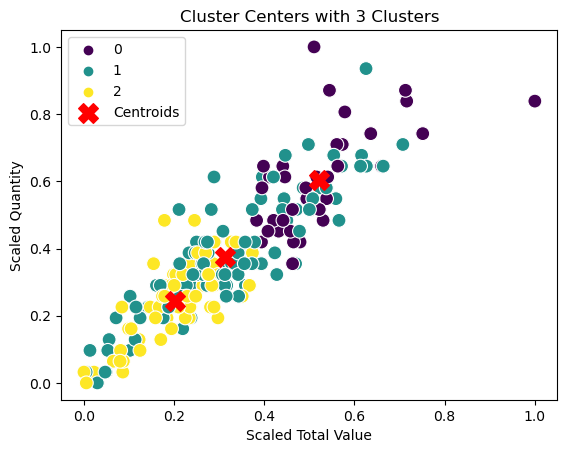

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Aggregate data for customer-level features
clustering_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       
    'Quantity': 'sum',          
    'Price_y': 'mean',          
    'Region': 'first',          
}).reset_index()

# Convert Region to numerical encoding
clustering_data['Region'] = clustering_data['Region'].astype('category').cat.codes

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data[['TotalValue', 'Quantity', 'Price_y', 'Region']])

# Apply KMeans Clustering 
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=20, max_iter=300)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_clustering_data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_clustering_data, clustering_data['Cluster'])
print(f"Davies-Bouldin Index (DB Index): {db_index}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_clustering_data, clustering_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters 
sns.scatterplot(x=scaled_clustering_data[:, 0], 
                y=scaled_clustering_data[:, 1], 
                hue=clustering_data['Cluster'], 
                palette="viridis", marker='o', s=100)
plt.title(f"Customer Segments (KMeans with {num_clusters} clusters)")
plt.xlabel("Scaled Total Value")
plt.ylabel("Scaled Quantity")
plt.legend(title='Cluster')
plt.show()
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# visualize the cluster centers in the feature space
sns.scatterplot(x=scaled_clustering_data[:, 0], 
                y=scaled_clustering_data[:, 1], 
                hue=clustering_data['Cluster'], 
                palette="viridis", marker='o', s=100)
# Plot the cluster centers
cluster_centers = kmeans.cluster_centers_[:, :2] 
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f"Cluster Centers with {num_clusters} Clusters")
plt.xlabel("Scaled Total Value")
plt.ylabel("Scaled Quantity")
plt.legend()
plt.show()
